## Author# Ganesh Kale
## Week# 9 & 10
## Date# Oct 30, 2021

### Activity 9

#### _import required packages_

In [1]:
import numpy as np  # for numeric operations
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization
import random   # for generating random numbers

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from bs4 import BeautifulSoup       # for web ecraping   
import re                          # regular expression
import requests
import ssl

In [2]:
#  Check the SSL certificate
# Ignore SSL certificate errors

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE


In [3]:
# read the html from url

url = 'https://www.gutenberg.org/browse/scores/top'

gutenberg_page = requests.get(url)

In [4]:
# function to check web page request status

def check_web_status(page):
    '''
    function to check status of web page request
    page - response of the web page request
    '''
    if page.status_code == 200:
        print('Sucess')
        return 200
    else:
        print('Failed')
        return -1    

In [5]:
# check the status of the web request

f"The web request status is {check_web_status(gutenberg_page)}"

Sucess


'The web request status is 200'

In [6]:
# decode the responze

# check encoding of response

encode = gutenberg_page.encoding
print(f"The encoding of the response is {encode}")

gutenberg_decode = gutenberg_page.content.decode(encode)
print(f"The type of decoded response is {type(gutenberg_decode)}")
print(f"The length of decoded response is {len(gutenberg_decode)}")

The encoding of the response is UTF-8
The type of decoded response is <class 'str'>
The length of decoded response is 58589


In [7]:
# store decoded rwesponse in bs4 object

soup = BeautifulSoup(gutenberg_decode,'html.parser')

In [8]:
# find all href links

href_urls = soup.find_all('a',href = True)

In [9]:
# create list to store all valid href links in list

href_lists = []

for link in href_urls:
    if len(link['href'])>6:       # only take valid hrefs and ignore just slashes or othet chars
        href_lists.append(link['href'])        # append to list

In [10]:
# display top 30 hrefs

href_lists[:30]

['/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30']

In [11]:
# get all the indices for link '#authors-last30'
# beacuse top 100 ebooks are between this tag of first two occurances

idx_list = []
idx = 0

for _ in range(href_lists.count('#authors-last30')):
    idx = href_lists.index('#authors-last30',idx)
    if not idx in idx_list:
        idx_list.append(idx)
        idx+=1
    else:
        break

In [12]:
# refind the list if links for top 100 ebooks and display 10 links

href_lists_final = href_lists[idx_list[0]+1:idx_list[1]]
href_lists_final[:10]

['/ebooks/1342',
 '/ebooks/84',
 '/ebooks/11',
 '/ebooks/2701',
 '/ebooks/345',
 '/ebooks/98',
 '/ebooks/41',
 '/ebooks/66628',
 '/ebooks/66627',
 '/ebooks/1661']

In [13]:
# find the book numbers and save in the list
#  all the links starts with 'ebooks' so we are going to look for link with this word and get book#

book_nums = []
pat = re.compile(r'[0-9]+')

for link in href_lists_final:
    if 'ebooks' in link:
        link = link.strip()    # remove white spaces if any
        num = pat.findall(link)[0]
        if num.isdigit():
            book_nums.append(num)

In [14]:
# display length and 100 ebooks ids

print(f"The total ebooks: {len(book_nums)}")
print(f"The ebooks numbers: {book_nums}")

The total ebooks: 100
The ebooks numbers: ['1342', '84', '11', '2701', '345', '98', '41', '66628', '66627', '1661', '25344', '46', '32992', '174', '4980', '1952', '1080', '219', '5200', '42324', '1232', '43', '1260', '32449', '2591', '66631', '408', '2542', '205', '4300', '64317', '66632', '2554', '1727', '48809', '2600', '63256', '16', '844', '66630', '76', '1184', '5740', '74', '6130', '514', '3207', '45', '996', '58585', '1497', '2148', '10007', '28054', '30254', '23', '1400', '2852', '7370', '5739', '55', '120', '16328', '3600', '36', '66623', '158', '4363', '10', '766', '160', '2814', '203', '135', '730', '42884', '36853', '1250', '27827', '66626', '24518', '768', '1998', '209', '66622', '779', '215', '244', '829', '61', '15399', '521', '20203', '236', '863', '1399', '113', '2848', '161', '902']


In [15]:
# display soup object text 2000 chars

soup.text[:2000].strip()

"Top 100 | Project Gutenberg\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenu▾\n\n\n\nAbout\n          ▾\n\n▾\n\n\nAbout Project Gutenberg\nCollection Development\nContact Us\nHistory & Philosophy\nPermissions & License\nPrivacy Policy\nTerms of Use\n\n\n\nSearch and Browse\n      \t  ▾\n\n▾\n\n\nBook Search\nBookshelves\nFrequently Downloaded\nOffline Catalogs\n\n\n\nHelp\n          ▾\n\n▾\n\n\nAll help topics →\nCopyright Procedures\nErrata, Fixes and Bug Reports\nFile Formats\nFrequently Asked Questions\nPolicies →\nPublic Domain eBook Submission\nSubmitting Your Own Work\nTablets, Phones and eReaders\nThe Attic →\n\n\nDonate\n\n\n\n\n\n\n\n\n\n\nDonation\n\n\n\n\n\n\n\nFrequently Viewed or Downloaded\nThese listings are based on the number of times each eBook gets downloaded.\n      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.\n

In [16]:
#  extracts the name of top 100 ebooks

top_100_ebooks_contents = soup.find_all('div', {'class':'page_content'})

# list to store books names
top_100_books_names = []

# loop over the page contents to find first tag 'ol'
# find 'li' tag and extract book names

for ol in top_100_ebooks_contents:
    a_tag = ol.find('a')    # find the first 'a' tag
    if a_tag.text == 'Top 100 EBooks yesterday':
        ol_tag = ol.find('ol')     # find the first 'ol' tag since it has 100 ebooks name
        for li in ol_tag.find_all('li'):
            top_100_books_names.append(li.text)      # store books names

In [17]:
# display few extracted book names

print(f"The total extracted books are: {len(top_100_books_names)}")
print('*'*10,'The top 5 book names', '*'*10)
top_100_books_names[:5]

The total extracted books are: 100
********** The top 5 book names **********


['Pride and Prejudice by Jane Austen (1310)',
 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (1261)',
 "Alice's Adventures in Wonderland by Lewis Carroll (667)",
 'Moby Dick; Or, The Whale by Herman Melville (638)',
 'Dracula by Bram Stoker (635)']

In [18]:
# the book names are as shown on the web page
# we use regex to clean the book names to remove numbers

clean_ebook_names = []

pat = re.compile(r'[0-9]+')

for name in top_100_books_names:
    idx = pat.search(name).span()[0]
    clean_ebook_names.append(name[:idx-1].strip())

In [29]:
# display the top 100 ebook names

for book in clean_ebook_names:
    print(book)

Pride and Prejudice by Jane Austen
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley
Alice's Adventures in Wonderland by Lewis Carroll
Moby Dick; Or, The Whale by Herman Melville
Dracula by Bram Stoker
A Tale of Two Cities by Charles Dickens
The Legend of Sleepy Hollow by Washington Irving
The Golden Chimney by Elizabeth Gerberding
The Cat's Paw by Natalie Sumner Lincoln
The Adventures of Sherlock Holmes by Arthur Conan Doyle
The Scarlet Letter by Nathaniel Hawthorne
A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens
The Youngest Girl in the School by Evelyn Sharp
The Picture of Dorian Gray by Oscar Wilde
Old Granny Fox by Thornton W.  Burgess
The Yellow Wallpaper by Charlotte Perkins Gilman
A Modest Proposal by Jonathan Swift
Heart of Darkness by Joseph Conrad
Metamorphosis by Franz Kafka
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley
The Prince by Niccolò Machiavelli
The Strange Case of Dr. Jekyll and Mr. Hyde 

## END

### Activity 10

#### import required libraries

In [20]:
import json
import os

from urllib import request, parse, error

In [21]:
# save url and api key in variables

base_url = 'http://www.omdbapi.com/?'
key_part = '&apikey='

In [22]:
# load apikey from json fiile

with open('omdb_api_key.json') as file:
    api_key = json.load(file)

for key, value in api_key.items():
    api_Key_var = key
    api_key_value = value

In [23]:
# create utility function to print movie data

json_keys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language','Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']

def print_json(data):
    for k in json_keys:
        if k in list(data.keys()):
            print(f"{k}:  {data[k]}")

In [24]:
# function to save poster of the movie from json data

def save_poster_file(data):
    title = data['Title']    # store movie title
    poster_url = data['Poster']
    poster_file = request.urlopen(poster_url).read()
    
#   save the file
    save_loc = os.getcwd()+'/'+'Posters'+'/'
    
    file_name = save_loc+title
    
    with open(file_name,'wb') as f:
        f.write(poster_file);


In [25]:
# function to search movie from json data

def search_movie(movie_title, save_poster):
    
    try:
        # open api url
        url = base_url+parse.urlencode({'t': str(movie_title)})+key_part+api_key_value
        page = request.urlopen(url)
        page_data = page.read()
        data = json.loads(page_data)
        
        # check the response of json data

        if data['Response'] =='True':
            print_json(data)
            
            if save_poster in ['Yes', 'yes', 'YES']:
                save_poster_file(data)
            else:
                print('Thanks')
        else:
            print("Unable to read movie details, error:",data['Error'])
            
        
    except error.URLError as er:
        print('Error Received:',er)

In [26]:
# Test the function by providing movie title and to download poster or not

movie_title = 'Titanic'
save_poster = 'yes'
print('Requested Movie Details: ')
print('*'*40)

search_movie(movie_title,save_poster)

Requested Movie Details: 
****************************************
Title:  Titanic
Year:  1997
Rated:  PG-13
Released:  19 Dec 1997
Runtime:  194 min
Genre:  Drama, Romance
Director:  James Cameron
Writer:  James Cameron
Actors:  Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot:  A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language:  English, Swedish, Italian, French
Country:  United States, Mexico, Australia
Awards:  Won 11 Oscars. 125 wins & 83 nominations total
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore:  75
imdbRating:  7.8
imdbVotes:  1,098,236
imdbID:  tt0120338


In [27]:
# test function by providing invalid movie name

movie_title = 'Random_error'
save_poster = 'yes'
print('Requested Movie Details: ')
print('*'*40)

search_movie(movie_title,save_poster)

Requested Movie Details: 
****************************************
Unable to read movie details, error: Movie not found!


## END

### Twitter API

In [215]:
# # load required libraries

import twitter

In [260]:
# get the key and tokens needed to access twitter data by running notebook where all keys are stored

%run ./twitter_keys.ipynb

In [261]:
# authenticate access by providing required keys and tokens

api = twitter.Api(consumer_key=api_key,
  consumer_secret=api_key_secret,
    access_token_key=access_token,
    access_token_secret=access_token_secret)

In [253]:
# get usertime line for specific screen name

screen_name = 'BellevueU'
tweets = api.GetUserTimeline(screen_name=screen_name,count=100) 

In [256]:
# create variables to pull twitter data and store info in

tweets_text = []
likes = []
time = []
retweet_count = []
truncated = []

# function to pull data from twitter and creaet dataframe

def create_df(tweets):
    for t in tweets:
        tweets_text.append(t.text)
        likes.append(t.favorite_count)
        time.append(t.created_at)
        retweet_count.append(t.retweet_count)
        truncated.append(t.truncated)
    
    # create df and store all these info

    df = pd.DataFrame({'tweets':tweets_text,'likes':likes,'times':time,'retweet_count':retweet_count,'truncated':truncated})
    
    return df

In [257]:
# dispaly head of df

bu_df = create_df(tweets)

# display shape and head of df

bu_df.shape
bu_df.head()

(100, 5)

,tweets,likes,times,retweet_count,truncated
0,Happy #NationalCareerDevelopmentMonth! Every B...,3,Fri Nov 05 17:00:05 +0000 2021,0,True
1,It's an absolute honor for us to help our coun...,2,Thu Nov 04 15:22:26 +0000 2021,0,True
2,BOO! We make school less scary. #HappyHallowee...,2,Sun Oct 31 19:54:27 +0000 2021,0,False
3,What's your favorite thing about fall? Is it t...,0,Sat Oct 30 17:01:07 +0000 2021,0,True
4,https://t.co/dEIecVfwkw,3,Fri Oct 29 18:19:39 +0000 2021,1,False


### Pull tweets of virendersehwag  - an Indian ex-cricketer 

In [270]:
# get usertime line for specific screen name

screen_name = 'virendersehwag'
vieu_tweets = api.GetUserTimeline(screen_name=screen_name,count=600) 

In [272]:
# dispaly head of df

viru = create_df(vieu_tweets)

# display shape and sampel tweets of df

viru.shape
viru.sample(5)

(600, 5)

,tweets,likes,times,retweet_count,truncated
297,She has created history. \nThe first ever woma...,42180,Mon Aug 30 02:57:54 +0000 2021,4398,True
65,"#OpenHouse TODAY, Aug. 24, 3-6:30 p.m. on the ...",2,Tue Aug 24 17:11:21 +0000 2021,0,True
294,"@DaleSteyn62 Go well, great man. You were fire...",17851,Tue Aug 31 10:35:23 +0000 2021,894,False
114,Thank you to each one of you who took time to ...,44214,Wed Oct 20 16:36:34 +0000 2021,1535,False
190,What Joy. Emotions.Hardwork. Innocence. Perse...,20405,Sat Sep 04 13:07:30 +0000 2021,1688,True


## END

### Visualizations

In [61]:
# load the data - austin housing prices

austin = pd.read_csv('Data/austinHousingData.csv')

In [62]:
# display shape and head of data

austin.shape
austin.head()

(15171, 29)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories
0,111373431,pflugerville,14424 Lake Victor Dr,78660.0,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,5,9/2/19,9,2019,"Coldwell Banker United, Realtors - South Austin",6011.0,2601,3.0,4,2
1,120900430,pflugerville,1104 Strickling Dr,78660.0,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,10/13/20,10,2020,Agent Provided,6185.0,1768,2.0,4,1
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660.0,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,7/31/19,7,2019,Agent Provided,7840.0,1478,2.0,3,1
3,120901374,pflugerville,1025 Strickling Dr,78660.0,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,4,8/8/18,8,2018,Agent Provided,6098.0,1678,2.0,3,1
4,60134862,pflugerville,15005 Donna Jane Loop,78660.0,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,3,10/31/18,10,2018,Agent Provided,6708.0,2132,3.0,3,2


## Line chart:

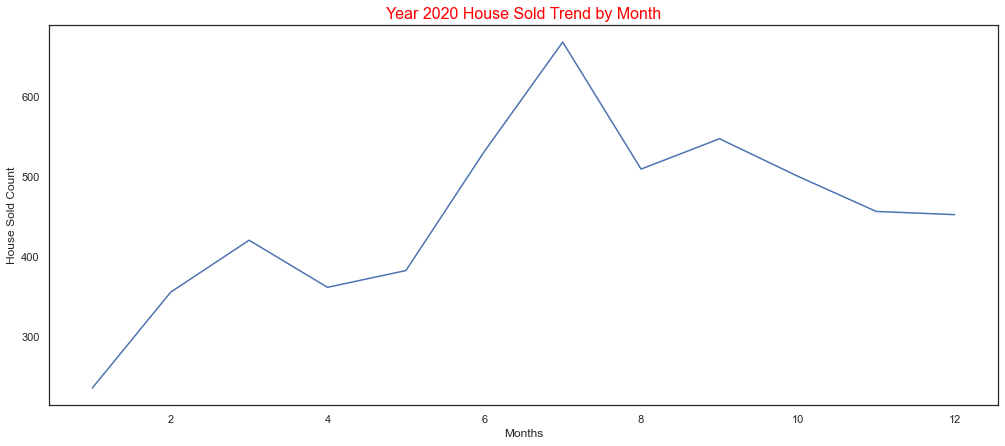

In [68]:
# display house sold trend for year 2020 in each month

# create df for year 2020
yr_2020 = austin[austin['latest_saleyear']==2020]

# set fig size and style

plt.figure(figsize=(17,7))
sns.set(style='white')

# plot the line chart
sns.lineplot(x=yr_2020['latest_salemonth'].value_counts().keys(), y = yr_2020['latest_salemonth'].value_counts().values)
plt.title('Year 2020 House Sold Trend by Month',{'color':'red','size':16})
plt.ylabel('House Sold Count')
plt.xlabel('Months');

Based on above line chart we can see in year 2020 july month most number houses were sold and in January least number of houses were sold.

### Scatter Plot

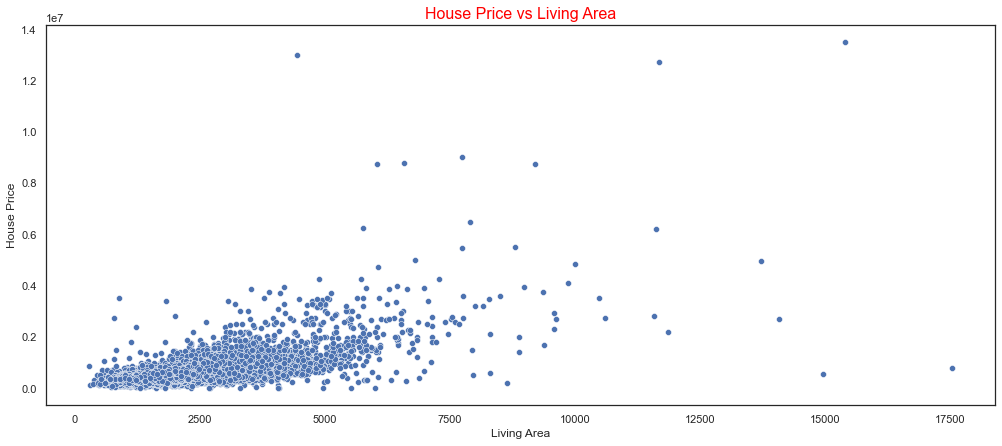

In [79]:
# show the house price- latestPrice vs livingAreaSqFt

# remove outlier from living area and save into new df

austin_scatter = austin[austin['livingAreaSqFt']<20000]

# set fig size and style

plt.figure(figsize=(17,7))
sns.set(style='white')

sns.scatterplot(data = austin_scatter, x = 'livingAreaSqFt', y ='latestPrice' )
plt.title('House Price vs Living Area',{'color':'red','size':16})
plt.ylabel('House Price')
plt.xlabel('Living Area');

Based on scatter plot we see the as area of house increases the house price is also increases, so they both are correlated to each other.

### Bar Plot

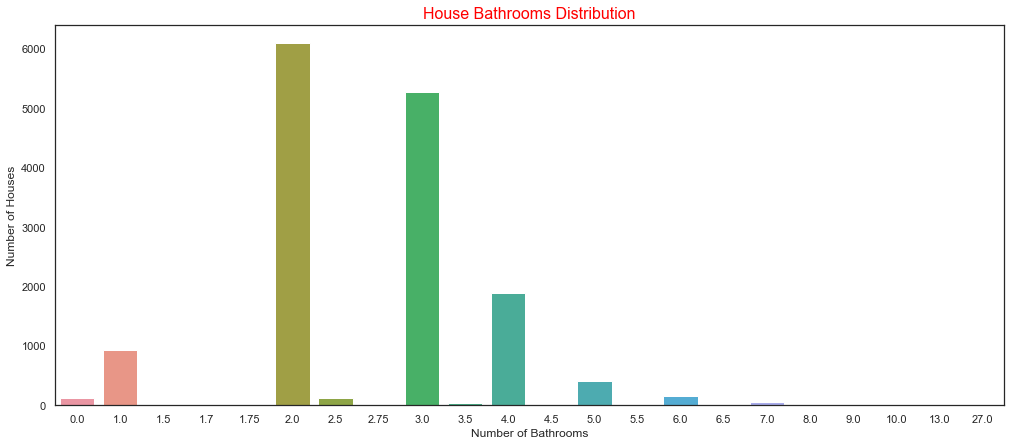

In [85]:
# lets see distribution number of bathroom houses using bar chart

# set fig size and style

plt.figure(figsize=(17,7))
sns.set(style='white')

sns.barplot(x = austin['numOfBathrooms'].value_counts().keys(),y=austin['numOfBathrooms'].value_counts().values)
plt.title('House Bathrooms Distribution',{'color':'red','size':16})
plt.ylabel('Number of Houses')
plt.xlabel('Number of Bathrooms');

Based on above bar char we can see there are houses with no bathrooms and houses with more than 10 bathrooms.
Majority of the houses are with bathrooms 2, 3 and 4

### Histogram

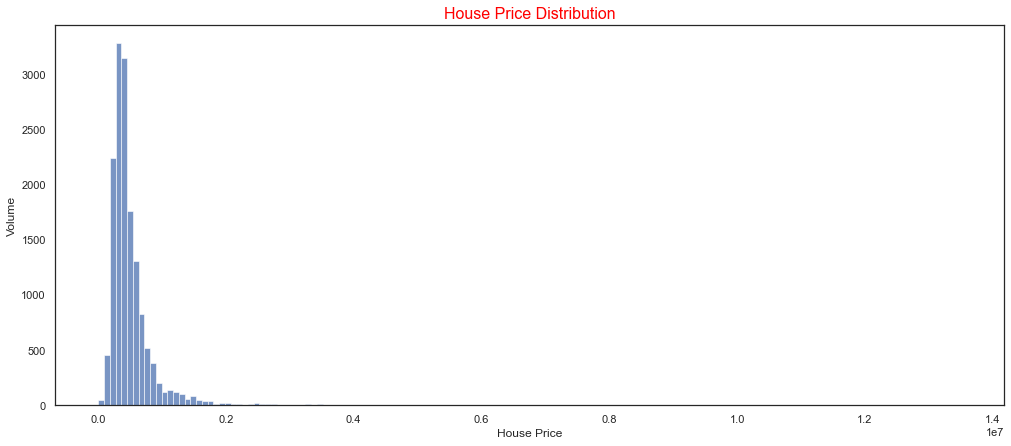

In [90]:
# lets see distrib ution of house prices for all houses

# set fig size and style

plt.figure(figsize=(17,7))
sns.set(style='white')

sns.histplot(data=austin,x='latestPrice',bins=150)
plt.title('House Price Distribution',{'color':'red','size':16})
plt.ylabel('Volume')
plt.xlabel('House Price');

Based on above hstogram we see that there are outliers in house price and mean house price is around - 0.5M

### Density Plot

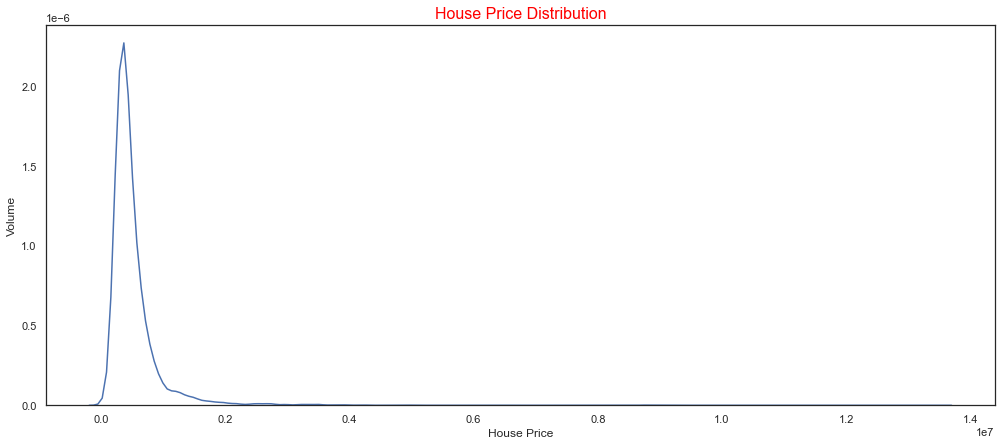

In [213]:
# lets see distribution of house prices for all houses using density plot

# set fig size and style

plt.figure(figsize=(17,7))
sns.set(style='white')

sns.kdeplot(data=austin,x='latestPrice')
plt.title('House Price Distribution',{'color':'red','size':16})
plt.ylabel('Volume')
plt.xlabel('House Price');

Based on above density plot it shows that the house prices are dense around 0.5M 

### Pie Chart

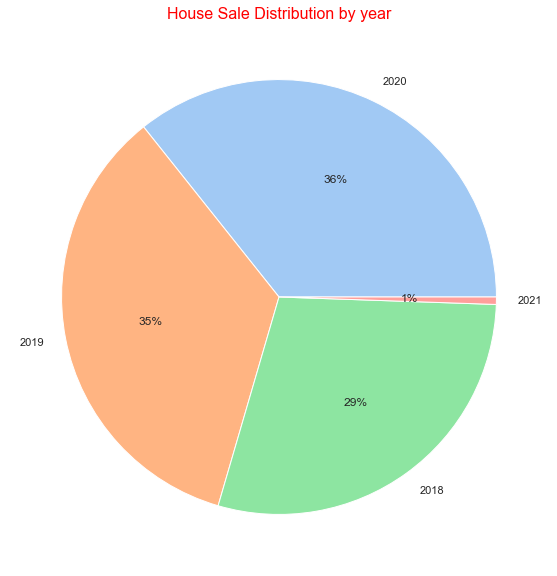

In [112]:
# create pie chart to show distribution of houses sold in each year

data = austin['latest_saleyear'].value_counts().values

lables = austin['latest_saleyear'].value_counts().keys()

#define Seaborn color palette to use

colors = sns.color_palette('pastel')[0:4]


# set fig size and style

plt.figure(figsize=(10,10))


#create pie chart
plt.pie(data, labels = lables, colors = colors, autopct='%.0f%%')
plt.title('House Sale Distribution by year',{'color':'red','size':16})
plt.show();

Based on above pie chart it is clear that in 2021 very less houses were sold and 2019 and 2020 years where most house were sold

## END